In [60]:
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np

In [81]:
plt.style.use('ggplot')

In [47]:
def load_text(filename):
    with open(f"../Data/{filename}", 'r', encoding='utf-8') as f:
        text = f.read().lower()
        return text

In [201]:
czech = load_text('czech.txt')
english = load_text('english.txt')
french = load_text('french.txt')
german = load_text('german.txt')
hungarian = load_text('hungarian.txt')
unknown0 = load_text('unknown0.txt')
unknown1 = load_text('unknown1.txt')
unknown2 = load_text('unknown2.txt')

texts = [
    ('Czech', czech),
    ('English', english),
    ('French', french),
    ('German', german),
    ('Hungarian', hungarian),
    ('unknown0', unknown0),
    ('unknown1', unknown1),
    ('unknown2', unknown2)
]

In [49]:
for name, text in texts:
    print(name)
    print(text[:100])

Czech
﻿the project gutenberg ebook, r.u.r., by karel čapek


this ebook is for the use of anyone anywhere 
English
﻿
this etext file is presented by project gutenberg, in
cooperation with world library, inc., from t
French
﻿project gutenberg's henri iii et sa cour, by alexandre dumas (père)

#9 in our series by alexandre 
German
﻿the project gutenberg ebook of faust, by johann wolfgang von goethe

this ebook is for the use of a
Hungarian
﻿the project gutenberg ebook of az uj földesur (1. kötet), by mór jókai

this ebook is for the use o


In [50]:
def entropy(counter):
    counter = Counter(text)
    n = len(text)
    entropy = 0
    for char in counter:
        pi = counter[char] / n
        entropy += pi * math.log(pi, 2)
    return -entropy

In [51]:
for name, text in texts:
    print(name, entropy(text))

Czech 4.837293313173991
English 4.237850921075277
French 4.509041198519111
German 4.463335366955408
Hungarian 4.683935622282411


In [114]:
def plot_histogram(text, name, i, n):
    counter = Counter(text)
    total = len(text)
    labels, values = zip(*counter.items())
    values = list(map(lambda x: x / total, values))
    indexes = np.arange(len(labels))
    width = 0.3

    plt.bar(indexes, values, width, label=name)
    plt.xticks(indexes + width * 0.5 + i, labels)

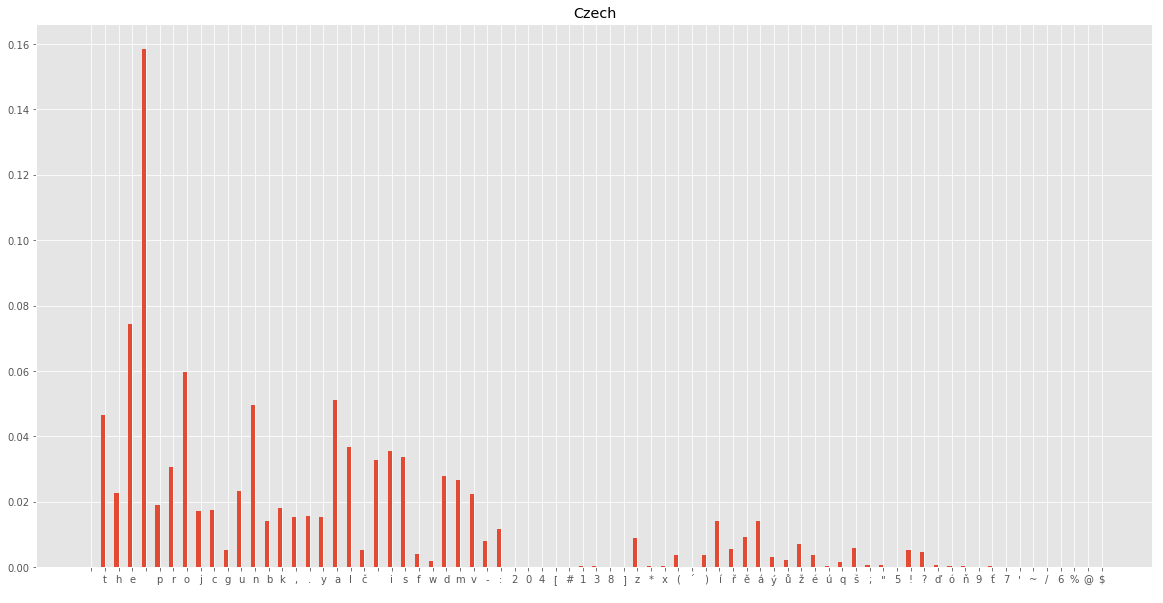

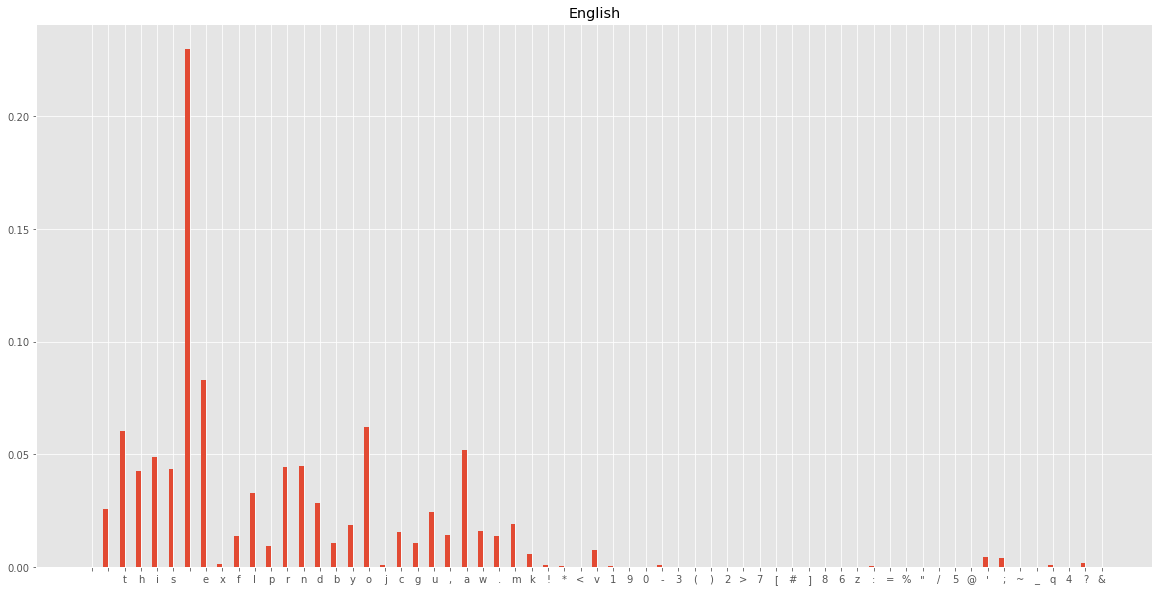

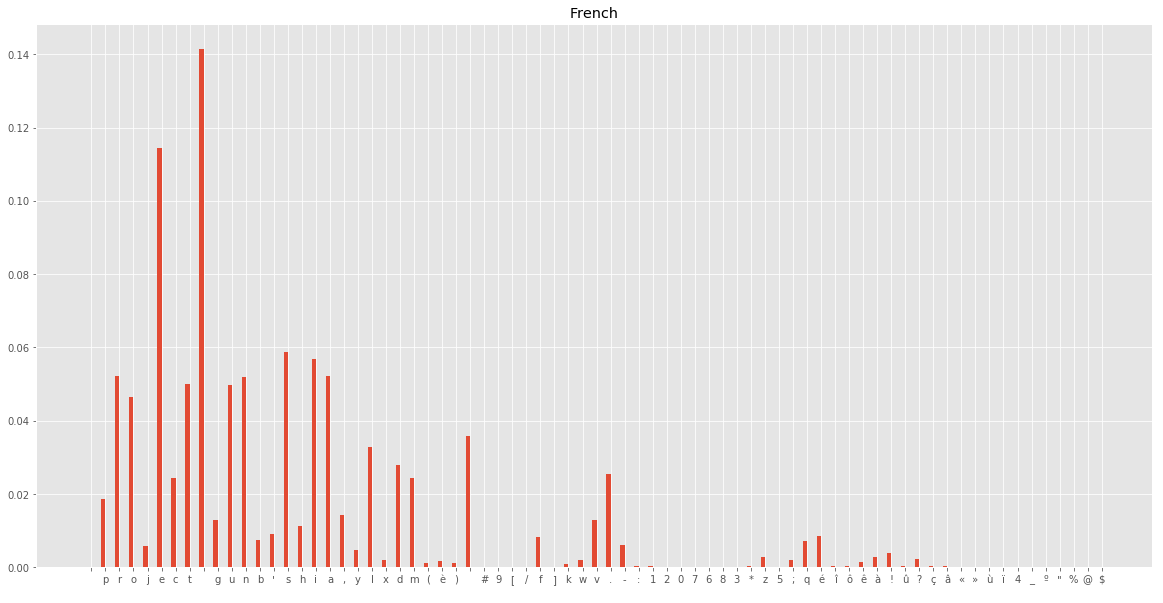

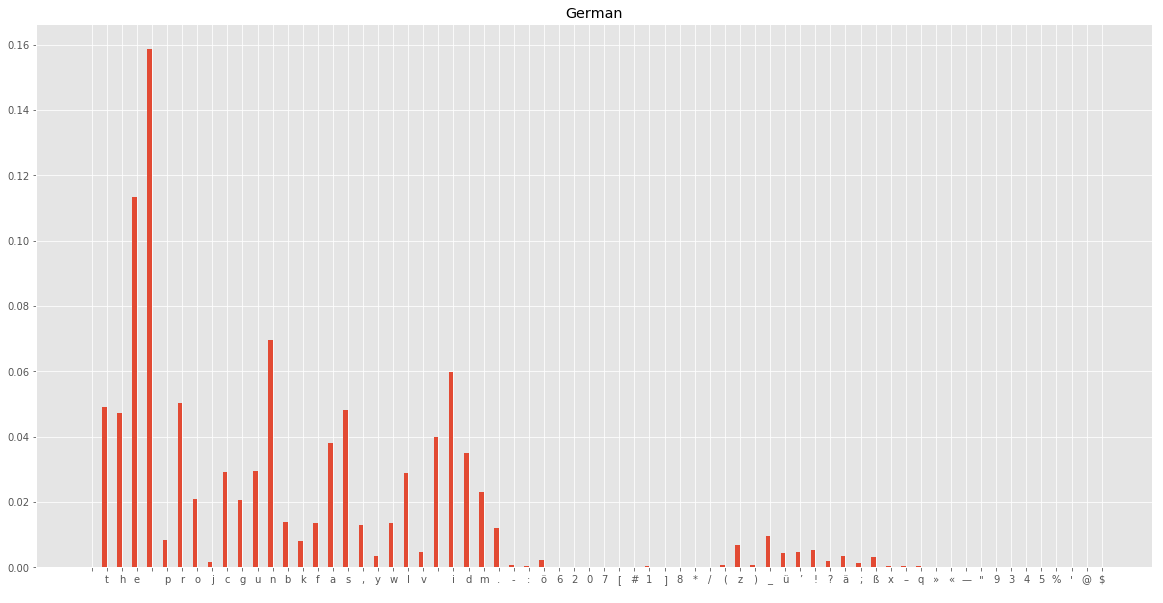

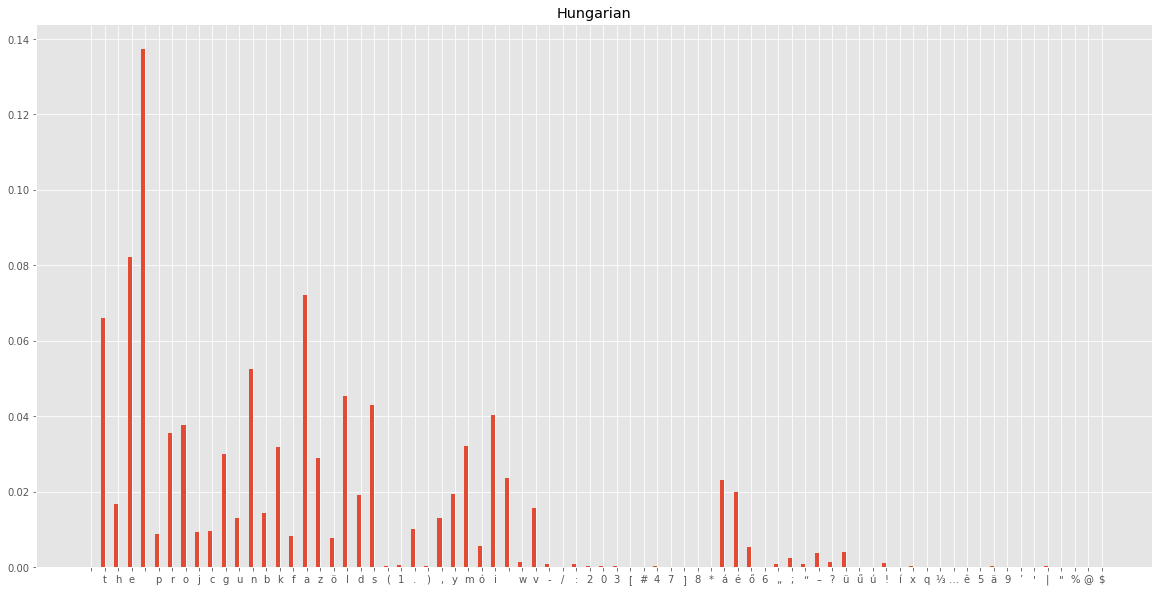

In [117]:
for name, text in texts:
    plt.figure(figsize=(20, 10))
    plt.title(name)
    plot_histogram(text, name, i, n)
    plt.show()

In [168]:
def plot_histogram_multi(labels, text, name, i, n):
    counter = Counter(text)
    total = len(text)
    values = list(map(lambda c: counter[c] / total, labels))
    width = 0.25
    indexes = np.arange(len(labels)) * width * (n + 1)

    plt.bar(indexes + (i * width), values, width, label=name)
    plt.xticks(indexes + width * 0.5, labels)

Czech 0
English 1
French 2
German 3
Hungarian 4


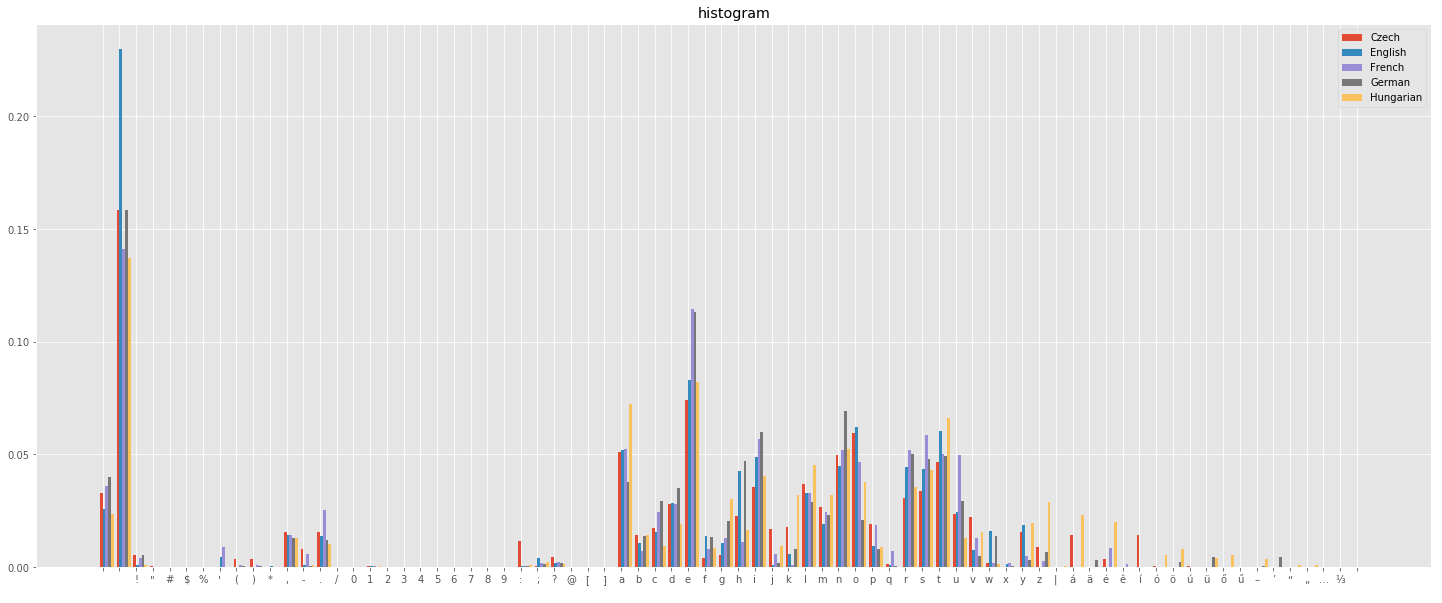

In [172]:
plt.figure(figsize=(25, 10))
n = len(texts)
all_chars = set()
for name, text in texts:
    all_chars = set(text)
all_chars = sorted(all_chars)

#all_chars = ['a','b', 'c']

for index, (name, text) in enumerate(texts):
    print(name, index)
    plot_histogram_multi(all_chars, text, name, index, n)
plt.legend(loc='upper right')
plt.title('histogram')
plt.show()

In [177]:
def manhattan_distance(all_chars, text1, text2):
    counter1 = Counter(text1)
    counter2 = Counter(text2)
    distance = 0
    for c in all_chars:
        p1 = counter1[c] / len(text1)
        p2 = counter2[c] / len(text2)
        distance += abs(p1 - p2)
    return distance

In [202]:
all_chars = set()
for name, text in texts:
    all_chars = set(text)
all_chars = sorted(all_chars)

print(' ' * 10, end='')
for name, _ in texts:
    print(f"{name:>10}", end='')
print()

for name1, text1 in texts:
    print(f"{name1:10}", end='')
    for name2, text2 in texts:
        print(f"{manhattan_distance(all_chars, text1, text2):10.2f}", end='')
    print()

               Czech   English    French    German Hungarian  unknown0  unknown1  unknown2
Czech           0.00      0.39      0.40      0.46      0.39      0.40      0.38      0.17
English         0.39      0.00      0.37      0.33      0.43      0.21      0.35      0.48
French          0.40      0.37      0.00      0.29      0.43      0.33      0.14      0.48
German          0.46      0.33      0.29      0.00      0.47      0.26      0.32      0.56
Hungarian       0.39      0.43      0.43      0.47      0.00      0.38      0.44      0.39
unknown0        0.40      0.21      0.33      0.26      0.38      0.00      0.33      0.48
unknown1        0.38      0.35      0.14      0.32      0.44      0.33      0.00      0.48
unknown2        0.17      0.48      0.48      0.56      0.39      0.48      0.48      0.00
